# Neural Network Classifier

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
import os
import sys
from keras.layers import Dense, Activation, BatchNormalization, InputLayer, Dropout
from keras.models import Sequential
from util import *

sns.set()

plt.rc('legend',fontsize=13)
plt.rc('axes',labelsize=15)
plt.rc('xtick',labelsize=13)
plt.rc('ytick',labelsize=13)

In [22]:
NUMBER_HIDDEN_NEURONS = 36

def get_model(feature_count, class_count, hidden_layer, use_batch_norm=True, optimizer='rmsprop', activation='sigmoid'):
	return_model = Sequential()
	return_model.add(InputLayer(input_shape=(feature_count,)))
	if use_batch_norm:
		return_model.add(BatchNormalization())
	for neurones in hidden_layer:
		return_model.add(Dense(neurones))
		return_model.add(Activation(activation))
		if use_batch_norm:
			return_model.add(BatchNormalization())
	return_model.add(Dense(class_count))
	return_model.add(Activation('softmax'))
	return_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
	return return_model

def perceptron(data_set, number_of_epoch, hidden_neurons=((NUMBER_HIDDEN_NEURONS,),), use_batch_norm_values=(True,), optimizer_values=('rmsprop',), activation_values=('sigmoid',), training_sizes=(-1,)):
	x_learn, y_learn, x_test, y_test = get_data(data_set=data_set)
	fit_dict = {}
	df = pd.DataFrame()
	for opt in optimizer_values:
		fit_dict[opt] = dict()
		for act in activation_values:
			fit_dict[opt][act] = dict()
			for use_batch_norm in use_batch_norm_values:
				fit_dict[opt][act][use_batch_norm] = dict()
				for layers in hidden_neurons:
					fit_dict[opt][act][use_batch_norm][layers] = dict()
					for train_limit in training_sizes:
						number_of_feature = len(x_learn[0])
						number_of_class = len(y_learn[0])
						model = get_model(number_of_feature, number_of_class, layers, use_batch_norm, opt, act)
						h = model.fit(
							x=np.array(x_learn[:train_limit]),
							y=np.array(y_learn[:train_limit]),
							batch_size=len(x_learn[:train_limit]),
							epochs=number_of_epoch,
							validation_data=(np.array(x_test), np.array(y_test)), verbose=0
						)
						epoch = h.epoch
						h_values = h.history.values()
						values = np.array([epoch, ] + list(h_values))
						tmp = pd.DataFrame(data=values.T, columns=["epoch", ] + list(h.history.keys()))
						tmp = tmp.assign(use_batch_norm=pd.Series([use_batch_norm] * number_of_epoch))
						tmp = tmp.assign(optimizer=pd.Series([opt] * number_of_epoch))
						tmp = tmp.assign(activation=pd.Series([act] * number_of_epoch))
						tmp = tmp.assign(layers=pd.Series([str(layers)] * number_of_epoch))
						tmp = tmp.assign(train_size=pd.Series([str(train_limit)] * number_of_epoch))
						df = df.append(tmp)
						fit_dict[opt][act][use_batch_norm][layers][train_limit] = dict()
						for i, e in enumerate(epoch):
							fit_dict[opt][act][use_batch_norm][layers][train_limit][e] = dict()
							for k, v in h.history.items():
								fit_dict[opt][act][use_batch_norm][layers][train_limit][e][k] = v[i]
	fit_dict_index = {
		'optimizer': 0,
		'activation': 1,
		'use_batch_norm': 2,
		'layers': 3,
		'train_limit': 4,
		'epoch': 5,
		'score_type': 6
	}
	return df, fit_dict, fit_dict_index

def run(data_set_name):
	if data_set_name == "gender":
		dff, tt, tti = perceptron(
			data_set_name,
			number_of_epoch=600,
			hidden_neurons=((), (15,), (10,), (5,), (10,5), (15,5)),
			use_batch_norm_values=(True, False),
			optimizer_values=('rmsprop',),
			activation_values=('sigmoid', 'relu', 'linear', 'selu'),
			training_sizes=range(500, 2001, 500)
		)
	elif data_set_name == "creditcard":
		dff, tt, tti = perceptron(
			data_set_name,
			number_of_epoch=600,
			hidden_neurons=((), (15,), (10,), (5,), (15, 5), (10, 5)),
			use_batch_norm_values=(True, False),
			optimizer_values=('rmsprop',),
			activation_values=('sigmoid', 'relu', 'linear', 'selu'),
			training_sizes=range(10000, 210000, 50000)
		)
	else:
		raise ValueError("unknow dataset:", data_set_name)
	if not os.path.exists("../stats"):
		os.makedirs("../stats")
	dff.to_csv(path_or_buf="../stats/per_test_" + data_set_name + ".csv")
	dff.to_csv(path_or_buf="../stats/per_" + data_set_name + ".csv")
	with open("../stats/per_" + data_set_name + "_dict.pikle", 'wb') as handle:
		pickle.dump(tt, handle, protocol=pickle.HIGHEST_PROTOCOL)
	with open("../stats/per_" + data_set_name + "_dict_indexes.pikle", 'wb') as handle:
		pickle.dump(tti, handle, protocol=pickle.HIGHEST_PROTOCOL)

# run("gender")
# run("creditcard")

Selected data set is gender with 4979 data (train: 3750 , test: 1229 )


/tmp/ipykernel_39416/150500325.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(tmp)
/tmp/ipykernel_39416/150500325.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(tmp)
/tmp/ipykernel_39416/150500325.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(tmp)
/tmp/ipykernel_39416/150500325.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(tmp)
/tmp/ipykernel_39416/150500325.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(tmp)
/tmp/ipykernel_39416/150500325.py:5

## Gender Dataset

In [23]:
data_set_name = "gender"
with open("../stats/per_" + data_set_name + "_dict.pikle", 'rb') as handle:
	dd = pickle.load(handle)
with open("../stats/per_" + data_set_name + "_dict_indexes.pikle", 'rb') as handle:
	ddi = pickle.load(handle)

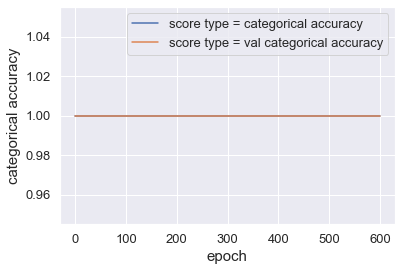

In [24]:
x_arg_name = 'epoch'
y_arg_name = 'score_type'
z_arg_name = 'score_type'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(
	dd, 
	consolidate_argx=x_arg_id, 
	argx_name=x_arg_name,
	consolidate_argy=y_arg_id, 
	argy_name=y_arg_name,
	consolidate_argz=z_arg_id,
	filters=[(ddi['score_type'], ['val_categorical_accuracy', 'categorical_accuracy'])]
)
plt.figure()
for a, d in cd.items():
	plt.plot(d.get(x_arg_name),d.get('median'), label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
	plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
plt.savefig("../graphics/per_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+"_full.png")
plt.show()

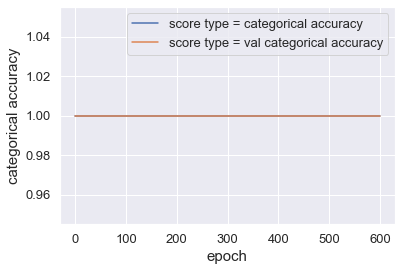

In [25]:
x_arg_name = 'epoch'
y_arg_name = 'score_type'
z_arg_name = 'score_type'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(
	dd, 
	consolidate_argx=x_arg_id, 
	argx_name=x_arg_name,
	consolidate_argy=y_arg_id, 
	argy_name=y_arg_name,
	consolidate_argz=z_arg_id,
	filters=[(ddi['score_type'], ['val_categorical_accuracy', 'categorical_accuracy']), (ddi['use_batch_norm'], True)]
)
plt.figure()
for a, d in cd.items():
	plt.plot(d.get(x_arg_name),d.get('median'), label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
	plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
plt.savefig("../graphics/per_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+".png")
plt.show()

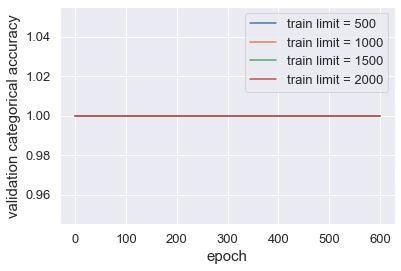

In [26]:
x_arg_name = 'epoch'
y_arg_name = 'score_type'
z_arg_name = 'train_limit'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(
	dd, 
	consolidate_argx=x_arg_id, 
	argx_name=x_arg_name,
	consolidate_argy=y_arg_id, 
	argy_name=y_arg_name,
	consolidate_argz=z_arg_id,
	filters=[(ddi['score_type'], ['val_categorical_accuracy']), (ddi['use_batch_norm'], True)]
)
plt.figure()
for a, d in cd.items():
	plt.plot(d.get(x_arg_name),d.get('median'), label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
	plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
plt.savefig("../graphics/per_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+".png")
plt.show()

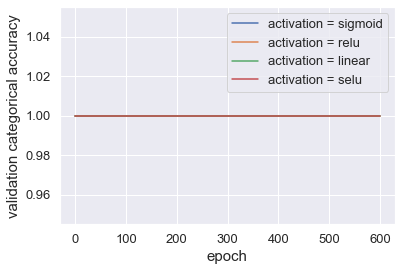

In [27]:
x_arg_name = 'epoch'
y_arg_name = 'score_type'
z_arg_name = 'activation'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(
	dd, 
	consolidate_argx=x_arg_id, 
	argx_name=x_arg_name,
	consolidate_argy=y_arg_id, 
	argy_name=y_arg_name,
	consolidate_argz=z_arg_id,
	filters=[(ddi['score_type'], ['val_categorical_accuracy']), (ddi['use_batch_norm'], True)]
)
plt.figure()
for a, d in cd.items():
	plt.plot(d.get(x_arg_name),d.get('median'), label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
	plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
plt.savefig("../graphics/per_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+".png")
plt.show()

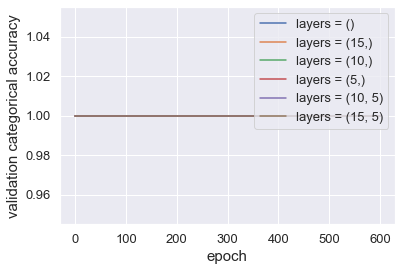

In [28]:
x_arg_name = 'epoch'
y_arg_name = 'score_type'
z_arg_name = 'layers'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(
	dd, 
	consolidate_argx=x_arg_id, 
	argx_name=x_arg_name,
	consolidate_argy=y_arg_id, 
	argy_name=y_arg_name,
	consolidate_argz=z_arg_id,
	filters=[(ddi['score_type'], ['val_categorical_accuracy']), (ddi['use_batch_norm'], True)]
)
plt.figure()
for a, d in cd.items():
	plt.plot(d.get(x_arg_name),d.get('median'), label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
	plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
plt.savefig("../graphics/per_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+".png")
plt.show()

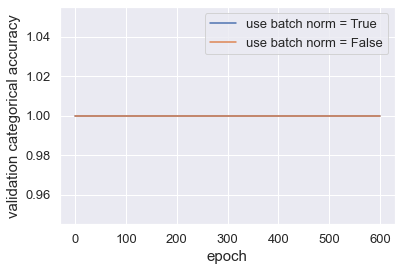

In [29]:
x_arg_name = 'epoch'
y_arg_name = 'score_type'
z_arg_name = 'use_batch_norm'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(
	dd, 
	consolidate_argx=x_arg_id, 
	argx_name=x_arg_name,
	consolidate_argy=y_arg_id, 
	argy_name=y_arg_name,
	consolidate_argz=z_arg_id,
	filters=[(ddi['score_type'], ['val_categorical_accuracy'])]
)
plt.figure()
for a, d in cd.items():
	plt.plot(d.get(x_arg_name),d.get('median'), label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
	plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
plt.savefig("../graphics/per_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+".png")
plt.show()

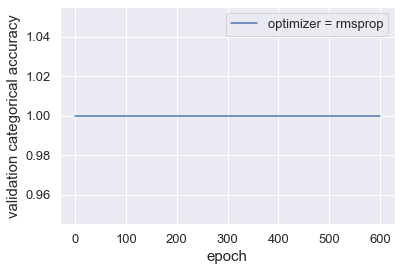

In [30]:
x_arg_name = 'epoch'
y_arg_name = 'score_type'
z_arg_name = 'optimizer'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(
	dd, 
	consolidate_argx=x_arg_id, 
	argx_name=x_arg_name,
	consolidate_argy=y_arg_id, 
	argy_name=y_arg_name,
	consolidate_argz=z_arg_id,
	filters=[(ddi['score_type'], ['val_categorical_accuracy']), (ddi['use_batch_norm'], True)]
)
plt.figure()
for a, d in cd.items():
	plt.plot(d.get(x_arg_name),d.get('median'), label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
	plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
plt.savefig("../graphics/per_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+".png")
plt.show()

## Creditcard Dataset

In [31]:
data_set_name = "creditcard"
with open("../stats/per_" + data_set_name + "_dict.pikle", 'rb') as handle:
	dd = pickle.load(handle)
with open("../stats/per_" + data_set_name + "_dict_indexes.pikle", 'rb') as handle:
	ddi = pickle.load(handle)

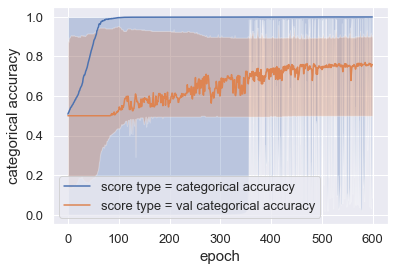

In [32]:
x_arg_name = 'epoch'
y_arg_name = 'score_type'
z_arg_name = 'score_type'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(
	dd, 
	consolidate_argx=x_arg_id, 
	argx_name=x_arg_name,
	consolidate_argy=y_arg_id, 
	argy_name=y_arg_name,
	consolidate_argz=z_arg_id,
	filters=[(ddi['score_type'], ['val_categorical_accuracy', 'categorical_accuracy'])]
)
plt.figure()
for a, d in cd.items():
	plt.plot(d.get(x_arg_name),d.get('median'), label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
	plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
plt.savefig("../graphics/per_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+"_full.png")
plt.show()

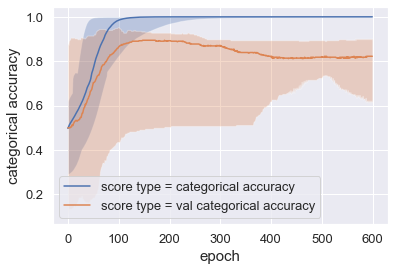

In [33]:
x_arg_name = 'epoch'
y_arg_name = 'score_type'
z_arg_name = 'score_type'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(
	dd, 
	consolidate_argx=x_arg_id, 
	argx_name=x_arg_name,
	consolidate_argy=y_arg_id, 
	argy_name=y_arg_name,
	consolidate_argz=z_arg_id,
	filters=[(ddi['score_type'], ['val_categorical_accuracy', 'categorical_accuracy']), (ddi['use_batch_norm'], True)]
)
plt.figure()
for a, d in cd.items():
	plt.plot(d.get(x_arg_name),d.get('median'), label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
	plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
plt.savefig("../graphics/per_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+".png")
plt.show()

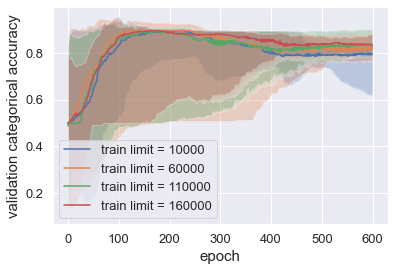

In [34]:
x_arg_name = 'epoch'
y_arg_name = 'score_type'
z_arg_name = 'train_limit'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(
	dd, 
	consolidate_argx=x_arg_id, 
	argx_name=x_arg_name,
	consolidate_argy=y_arg_id, 
	argy_name=y_arg_name,
	consolidate_argz=z_arg_id,
	filters=[(ddi['score_type'], ['val_categorical_accuracy']), (ddi['use_batch_norm'], True)]
)
plt.figure()
for a, d in cd.items():
	plt.plot(d.get(x_arg_name),d.get('median'), label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
	plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
plt.savefig("../graphics/per_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+".png")
plt.show()

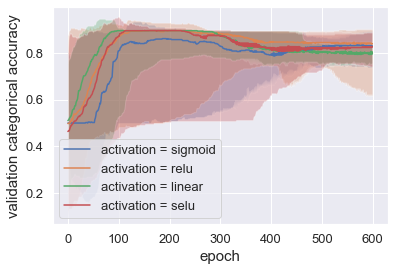

In [35]:
x_arg_name = 'epoch'
y_arg_name = 'score_type'
z_arg_name = 'activation'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(
	dd, 
	consolidate_argx=x_arg_id, 
	argx_name=x_arg_name,
	consolidate_argy=y_arg_id, 
	argy_name=y_arg_name,
	consolidate_argz=z_arg_id,
	filters=[(ddi['score_type'], ['val_categorical_accuracy']), (ddi['use_batch_norm'], True)]
)
plt.figure()
for a, d in cd.items():
	plt.plot(d.get(x_arg_name),d.get('median'), label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
	plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
plt.savefig("../graphics/per_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+".png")
plt.show()

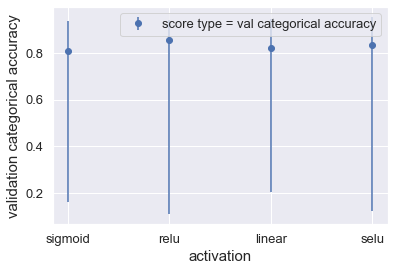

In [36]:
x_arg_name = 'activation'
y_arg_name = 'score_type'
z_arg_name = 'score_type'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(
	dd, 
	consolidate_argx=x_arg_id, 
	argx_name=x_arg_name,
	consolidate_argy=y_arg_id, 
	argy_name=y_arg_name,
	consolidate_argz=z_arg_id,
	filters=[(ddi['score_type'], ['val_categorical_accuracy']), (ddi['use_batch_norm'], True)]
)
plt.figure()
for a, d in cd.items():
	plt.errorbar(
		d.get(x_arg_name),d.get('median'), 
		yerr=[d.get('median') - d.get('min'),d.get('max') - d.get('median')],
		fmt='o',
		label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' ')
	)
plt.ylabel('validation categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
plt.savefig("../graphics/per_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+".png")
plt.show()

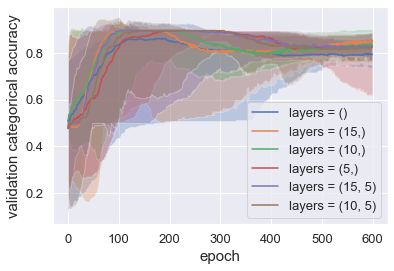

In [37]:
x_arg_name = 'epoch'
y_arg_name = 'score_type'
z_arg_name = 'layers'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(
	dd, 
	consolidate_argx=x_arg_id, 
	argx_name=x_arg_name,
	consolidate_argy=y_arg_id, 
	argy_name=y_arg_name,
	consolidate_argz=z_arg_id,
	filters=[(ddi['score_type'], ['val_categorical_accuracy']), (ddi['use_batch_norm'], True)]
)
plt.figure()
for a, d in cd.items():
	plt.plot(d.get(x_arg_name),d.get('median'), label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
	plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
plt.savefig("../graphics/per_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+".png")
plt.show()

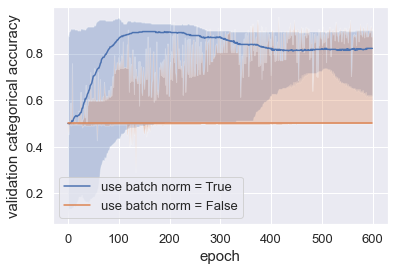

In [38]:
x_arg_name = 'epoch'
y_arg_name = 'score_type'
z_arg_name = 'use_batch_norm'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(
	dd, 
	consolidate_argx=x_arg_id, 
	argx_name=x_arg_name,
	consolidate_argy=y_arg_id, 
	argy_name=y_arg_name,
	consolidate_argz=z_arg_id,
	filters=[(ddi['score_type'], ['val_categorical_accuracy'])]
)
plt.figure()
for a, d in cd.items():
	plt.plot(d.get(x_arg_name),d.get('median'), label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
	plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
plt.savefig("../graphics/per_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+".png")
plt.show()